Проект анализ подкатегории "Аксессуары и инвентарь для тяжелой атлетики" на маркетплейсе Wildberries

Данные по категории были актуальны на 29.08.2023

В данном проекте я продемонстрирую анализ подкатегории "Аксессуары и инвентарь для тяжелой атлетики" на маркетплейсе Wildberries и выберу товар, который на мой взгляд может быть продаваемым. 

1. Выгрузка библиотек.
2. Выгрузка данных
3. Преодобработка данных. 
- Удаление лишних колонок
- Добавление новых колонок
- Преобразование колонок в нужный тип 
- Удаление лишней информации из названий брендов 
- Проверка датасета на дубликаты и пропуски
4. Исследовательский анализ данных 
- Анализ продуктов, скидка на которые не превышает 30% и стоимость которых меньше 2000 рублей
- Выбор товара с наибольшим оборотом 
- Анализ конкурентов в нише 
5. Визуализация данных 
- Выявление корреляции величины заказов от разных показателей: (отзывов, рейтинга, точных отзывов, цены товара) 
- Выявление топа товаров по количеству отзывов, количеству заказов, величине скидки и расходов. 
- Выгрузка датасетов с отзывами 
- Построение графиков с историей отзывов 
6. Выявление товара, который можно рассмотреть для продажи. 
7. Выводы и рекомендации

1. Выгрузка библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px
import re
import csv


2. Выгрузка датасетов 

In [2]:
df = pd.read_csv('prod1.csv', sep=',')
df2 = pd.read_csv('prod2.csv', sep=',')
df3 = pd.read_csv('prod3.csv', sep=',')
df4 = pd.read_csv('prod4.csv', sep=',')
df5 = pd.read_csv('prod5.csv', sep=',')
df6 = pd.read_csv('prod6.csv', sep=',')
df7 = pd.read_csv('prod7.csv', sep=',')
df8 = pd.read_csv('prod8.csv', sep=',')
df9 = pd.read_csv('prod9.csv', sep=',')
df10 = pd.read_csv('prod10.csv', sep=',')
df11 = pd.read_csv('prod11.csv', sep=',')
df12 = pd.read_csv('prod12.csv', sep=',')
df13 = pd.read_csv('prod13.csv', sep=',')
df14 = pd.read_csv('prod14.csv', sep=',')
df15 = pd.read_csv('prod15.csv', sep=',')
df16 = pd.read_csv('prod16.csv', sep=',')
df17 = pd.read_csv('prod17.csv', sep=',')
df18 = pd.read_csv('prod18.csv', sep=',')
df19 = pd.read_csv('prod19.csv', sep=',')
df20 = pd.read_csv('prod20.csv', sep=',')
orders = pd.read_csv('order_all.csv', sep=',')

In [3]:
data = pd.concat([
    df,
    df2,
    df3,
    df4,
    df5,
    df6,
    df7,
    df8,
    df9,
    df10,
    df11,
    df12,
    df13,
    df14,
    df15,
    df16,
    df17,
    df18,
    df19
])


3. Предобработка данных 

In [4]:
orders = orders.drop_duplicates()
orders = orders.drop (index= 1 ) 


In [5]:
orders = orders.drop(columns=['Unnamed: 0','date']) 
#удаляем лишние колонки 

In [6]:
orders.info()
#как видно в колонках содержится информация типа objekt. Для дальнейшей работы нужно int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 3798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1898 non-null   object
 1   text    1898 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [7]:
orders = orders.astype('int64')
orders.info()
#Мы преобразовали данные в тип int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 3798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1898 non-null   int64
 1   text    1898 non-null   int64
dtypes: int64(2)
memory usage: 44.5 KB


In [8]:
data.info()
# В датасете data, содержашем информацию о характеристиках товаров нет проблем. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1900 non-null   int64  
 1   brand         1900 non-null   object 
 2   name          1900 non-null   object 
 3   sale          1900 non-null   int64  
 4   rating        1900 non-null   int64  
 5   reviewRating  1900 non-null   float64
 6   feedbacks     1900 non-null   int64  
 7   time1         1900 non-null   int64  
 8   time2         1900 non-null   int64  
 9   priceU        1900 non-null   float64
 10  salePriceU    1900 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 178.1+ KB


In [9]:
data = data.merge(orders, on=['id'])
# Соединим датасет с датасетом, содержащим информацию о заказах 


In [10]:
data['text'].isnull().sum()
#В датасете нет пропусков 


0

In [11]:
data.rename(columns = {'text':'orders' }, inplace = True )
#Переименуем колонки 

In [12]:
data

id                    brand  \
0     163143066                  MedKing   
1     148420357             AtletBarbell   
2      74060316                 Steffmon   
3     147549558             AtletBarbell   
4     100814501          Russian Turbine   
...         ...                      ...   
1895  108132237  Бандаж для руки от Жако   
1896  150788764                 MironFit   
1897  151030161              Напульсники   
1898  156102621               Напульсник   
1899   38250592                      ZSO   

                                                   name  sale  rating  \
0     Наколенник для суставов ортопедический женский...    72       5   
1                                       Блин для штанги    18       5   
2     Ортопедический эластичный наколенник для суста...    76       5   
3                                       Блин для штанги    18       5   
4     Наколенники спортивные для пауэрлифтинга RT PO...    29       5   
...                                                 ...   ...     ...   
1895              Напульсник для рук или Бандаж для рук    20       0   
1896          Диск пластиковый цемент чёрный (d 26 мм.)    59       5   
1897  Напульсник спортивный на руку запястье бандаж ...    76       5   
1898           спортивный на руку бандаж фиксатор кисти    82       0   
1899                Зажимы на гриф замок для грифа 1 шт    71       0   

      reviewRating  feedbacks  time1  time2  priceU  salePriceU  orders  
0              4.6         46      5     49  2415.0       656.0     300  
1              5.0         77     60     54  4966.0      4072.0     700  
2              4.8        421      5     49  2180.0       523.0    2400  
3              4.8         45      4     54  5103.0      4184.0     400  
4              4.8        129     10     48  7400.0      5209.0    1000  
...            ...        ...    ...    ...     ...         ...     ...  
1895           0.0          0     60    232  1114.0       891.0       0  
1896           5.0          1     60    232  2000.0       820.0       0  
1897           5.0          1     60    239  3000.0       720.0       5  
1898           0.0          0     60    239  2800.0       492.0       1  
1899           0.0          0     26    288  1458.0       420.0       1  

[1900 rows x 12 columns]

In [13]:
data['priceU']= data['priceU'].astype('int64')
data['salePriceU']= data['salePriceU'].astype('int64')
#Избавимся от числе после точки 

In [14]:
data['ransoms'] = data['orders']*data['salePriceU']
#Добавим колонку с примерной выручкой

In [15]:
data.set_axis(data.columns.str.lower(), axis='columns', inplace=True)

In [16]:
data.isna().sum()
#Проверим датасет на пропуски

id              0
brand           0
name            0
sale            0
rating          0
reviewrating    0
feedbacks       0
time1           0
time2           0
priceu          0
salepriceu      0
orders          0
ransoms         0
dtype: int64

In [17]:
data['id'].duplicated().sum()

2

В датасете в столбце id обнаружено два дубликата. Это незначительно. Можно оставить 

In [18]:
data['name'].duplicated().sum()

899

In [19]:
data['brand'].value_counts()

Антат                      88
MB Atlet                   76
ONHILLSPORT                75
MB-Barbell                 67
Starfit                    66
                           ..
SAMILEM                     1
KATENOK                     1
STRONG BODY                 1
Forma/                      1
Бандаж для руки от Жако     1
Name: brand, Length: 263, dtype: int64

В датасете много брендов с разными товарами 

In [20]:
data['name'].value_counts()

Диск для штанги                                            122
Блин для штанги                                             34
Диск обрезиненный                                           34
Наколенник                                                  31
Аксессуар для тяжелой атлетики                              27
                                                          ... 
Блины для штанги гантелей грифа обрезиненные 1 кг 4 шт       1
Диски 2,5 кг 51 мм, блины металлические - 2 шт               1
Диски 2,5 кг 31 мм, блины металлические - 4 шт               1
Диск 5 кг 26 мм для штанги и гантели, блин обрезиненный      1
Зажимы на гриф замок для грифа 1 шт                          1
Name: name, Length: 1001, dtype: int64

В датасете много слов, которые могут помешать проводить анализ. 

In [21]:
data.name = data.name.str.replace(',*', '', regex=True)
data.name = data.name.str.replace('кг', '', regex=True)
data.name = data.name.str.replace('мм', '', regex=True)
data.name = data.name.str.replace('шт ', '', regex=True)
data.name = data.name.str.replace('см', '', regex=True)
#Избавимся от лишних символов 

In [22]:
data['name'].value_counts()

Диск для штанги                                            122
Блин для штанги                                             34
Диск обрезиненный                                           34
Наколенник                                                  31
Аксессуар для тяжелой атлетики                              27
                                                          ... 
Диск 20  26  для штанги блин металлический обрезиненный      1
Блин 25  для штанг и гантелей 51                             1
Диск 15  26  для штанги и гантели блин обрезиненный          1
Блины для штанги гантелей грифа обрезиненные 1  4 шт         1
Зажимы на гриф замок для грифа 1 шт                          1
Name: name, Length: 993, dtype: int64

В датасете остались цифры, от которых можно избавиться 

In [23]:
def get_illegal_characters(data, name, legitimate_characters, encoding='utf8', DEBUG=False):

  # получим все не легитимные символы из датафрейма
  result = data[name].str.extractall(legitimate_characters)  

  # Решим проблему с повторениями.
  result = result[0].unique()

  result = pd.DataFrame(result)

  # Добавим столбец с hex кодировкой символов.
  result['hex_code'] = result[0].str.encode(encoding)

  # Дадим адекватные имена столбцам.
  result.rename(columns={0: 'character'}, inplace=True)

  if (DEBUG):
    print("Найдено", result.shape[0], "уникальных символов не подходящих под заданный шаблон.")
    print("Найдены следующие символы:\n", result)

  return result
# Шаблон "легитимных символов". Использование этих символов допустимо в русском языке.
# Естественно символ пробела мы тоже оставим, иначе наши слова "склеятся".
legitimate_characters = "([^а-яёА-ЯЁ ])"

# Имя столбца, который необходимо проверить
column_name = 'name'

bad_symbols =  get_illegal_characters(data, column_name, legitimate_characters)


In [24]:
template = '|'.join(map(re.escape, bad_symbols['character']))

# Удалим ненужные символы из датасета.
data['name'] = data['name'].str.replace(template, '', regex=True, flags=re.UNICODE)

In [25]:
data['name'].value_counts()

Диск для штанги                          122
Диск                                      51
Блин для штанги                           34
Диск обрезиненный                         34
Наколенник                                31
                                        ... 
Бинт спортивный кистевой                   1
Диск   чугунный                            1
Цепи      по   звена  шт                   1
Комплект дисков  обрезиненных  х           1
Напульсник для рук или Бандаж для рук      1
Name: name, Length: 555, dtype: int64

В датасете все еще есть лишние символы, но их удаление может исказить названия товаров 

4. Исследовательский анализ данных

In [26]:
data_by_ransoms = data.pivot_table(index=['name'], values='ransoms', aggfunc= {'sum'})
data_by_ransoms = data_by_ransoms.reset_index()
data_by_ransoms = data_by_ransoms.rename(columns={'sum': 'ransoms_by_name'})
data_by_ransoms = data_by_ransoms.query('ransoms_by_name>= 100000 and ransoms_by_name<=200000')
data_by_ransoms = data_by_ransoms.sort_values(by='ransoms_by_name', ascending=False)
#Построим сводную таблицу, чтобы выявить выручку по нишам

В нишу с величиной оборота больше 200 тыс. рублей тяжело зайти. Мы отметим это, добавив новую колонку 

In [27]:
data['pricer'] = round (data['salepriceu'], -2)
data_by_price = data.pivot_table(index=['pricer'], values='orders', aggfunc= {'sum'})
data_by_price = data_by_price.reset_index()
data_by_price = data_by_price.sort_values(by='sum', ascending=False)
data_by_price

pricer    sum
3       400  94241
4       500  47291
2       300  41727
5       600  19157
11     1200  10694
..      ...    ...
75     8300      0
73     7700      0
70     7300      0
60     6200      0
103   92800      0

[104 rows x 2 columns]

В данной подкатегории больше всего заказов у товаров по цене со скидкой 400 рублей

In [28]:
data['priceru'] = round (data['priceu'], -2)
data_by_price = data.pivot_table(index=['priceru'], values='orders', aggfunc= {'sum'})
data_by_price = data_by_price.reset_index()
data_by_price = data_by_price.sort_values(by='sum', ascending=False)
data_by_price

priceru    sum
6        700  35039
16      1700  34972
7        800  28854
11      1200  24213
9       1000  15486
..       ...    ...
135    17700      0
136    17800      0
137    18100      0
140    19100      0
170   128700      0

[171 rows x 2 columns]

В данной подкатегории больше всего заказов у товаров без скидки по цене 700 рублей

In [29]:
round (data['sale'].mean())

47

В среднем скидка у товаров в подкатегории - 47

In [30]:
data_b = data.pivot_table(index=['sale'], values='orders', aggfunc= {'sum'})
data_b = data_b.sort_values(by='sum', ascending=False)
data_b = data_b.reset_index()
data_b

sale    sum
0     75  15521
1     60  14774
2     47  14618
3     59  13283
4     74  13130
..   ...    ...
74    10     39
75    28     10
76    87      6
77    11      0
78    92      0

[79 rows x 2 columns]

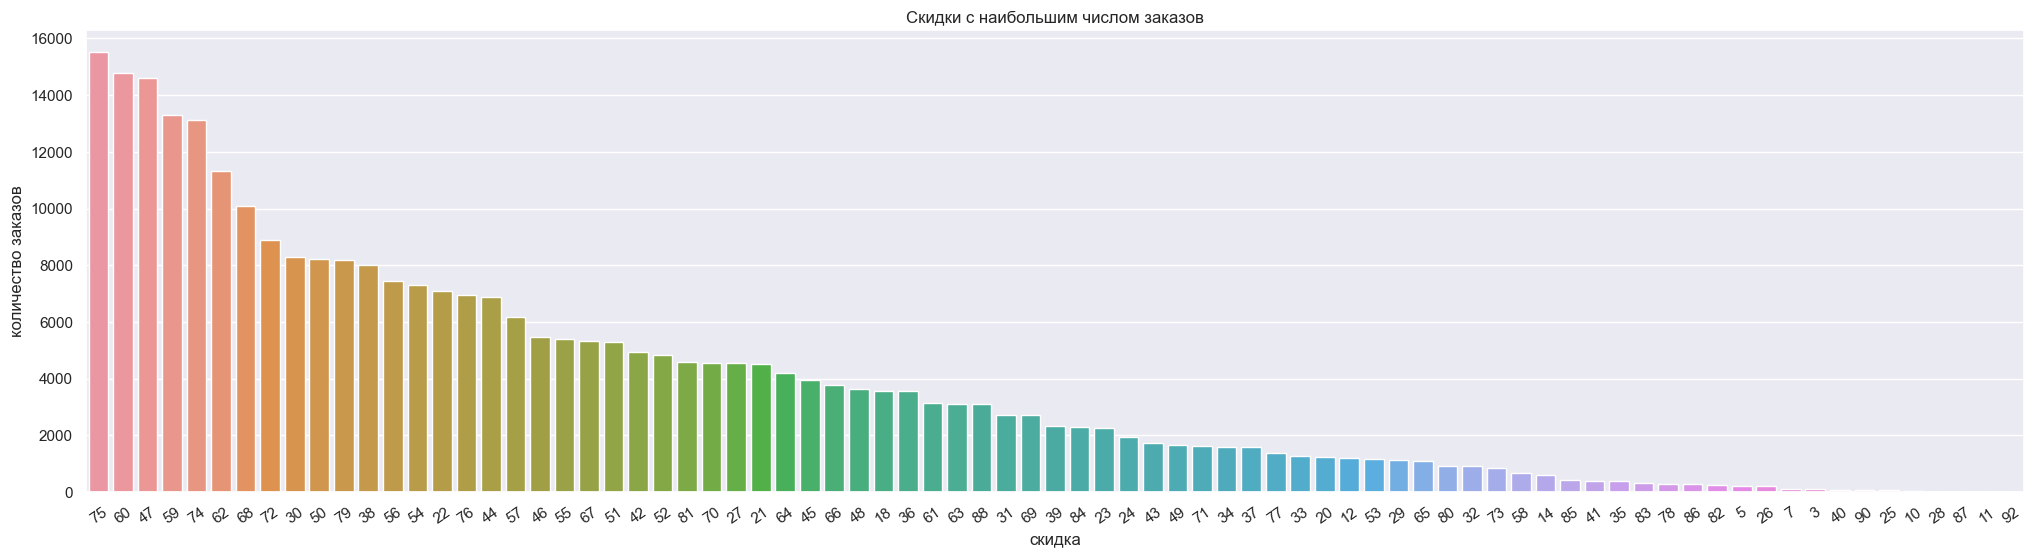

In [72]:
ax = sns.barplot(x='sale', y='sum', data=data_b, order=data_b['sale'])
sns.set(rc={'figure.figsize': (25, 6)})
ax.set(xlabel='скидка', ylabel='количество заказов', title='Скидки с наибольшим числом заказов')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)

plt.show()

Как видно из графика, у товаров с большой скидкой больше заказов. Достаточно много заказов у товаров со скидкой - 30

In [32]:
new_data = data.merge(data_by_ransoms, on=['name'])

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               206 non-null    int64  
 1   brand            206 non-null    object 
 2   name             206 non-null    object 
 3   sale             206 non-null    int64  
 4   rating           206 non-null    int64  
 5   reviewrating     206 non-null    float64
 6   feedbacks        206 non-null    int64  
 7   time1            206 non-null    int64  
 8   time2            206 non-null    int64  
 9   priceu           206 non-null    int64  
 10  salepriceu       206 non-null    int64  
 11  orders           206 non-null    int64  
 12  ransoms          206 non-null    int64  
 13  pricer           206 non-null    int64  
 14  priceru          206 non-null    int64  
 15  ransoms_by_name  206 non-null    int64  
dtypes: float64(1), int64(13), object(2)
memory usage: 27.4+ KB


In [33]:
new_data = new_data.query('sale <= 30 and salepriceu <= 2000')
products = new_data.sort_values(by='ransoms_by_name', ascending=False)
#Найдем товары со скидкой меньше 30 и ценой товара со скидкой меньше 2000

Посмотрим на товары, которые стоят меньше 2000 рублей и со скидкой меньше 30

In [34]:
products

id             brand  \
53   151145997  D.F powerlifting   
12    16600202        Green Hill   
164   21029563     Barbell Atlet   
48   123007558            ProRun   
121  165286332           Mr. FOX   
55   154476290    RimbatorsDepot   
60   152141862      AZ PRO SPORT   
75   139459763           KultLab   
76   139462480           KultLab   
77   139459775           KultLab   
81   168505513       CritesShell   

                                                  name  sale  rating  \
53   Наколенники для тяжёлой атлетикифитнесакроссфита     24       5   
12                          Лямки для тяжелой атлетики    21       5   
164                                             Диск      30       5   
48                         Набор дисков для штанги х      20       5   
121                     Зажимы на гриф быстросъемные      24       5   
55    Напульсник для тяжёлой атлетики эластичный левый    20       0   
60                               Напульсник спортивный    26       5   
75   Кистевые бинты фиксаторы запястья  ортез лучез...    30       5   
76   Кистевые бинты фиксаторы запястья  ортез лучез...    30       5   
77   Кистевые бинты фиксаторы запястья  ортез лучез...    30       5   
81                    Наколенники лечебные согревающие    20       0   

     reviewrating  feedbacks  time1  time2  priceu  salepriceu  orders  \
53            4.6        148     10     48    2500        1900     100   
12            4.8         25     10     48    1188         930     100   
164           5.0         10     60     54     868         604     300   
48            5.0         82     10     48     750         596     300   
121           4.8         10      6     71    2220        1687       0   
55            0.0          0     60     54     928         742       0   
60            4.7          6     60     67     560         413      80   
75            4.6         23     10     48     950         662     100   
76            4.6         23     25    182     850         592     100   
77            4.6         23     25    182     950         662      30   
81            0.0          0     67     54    2047        1637       0   

     ransoms  pricer  priceru  ransoms_by_name  
53    190000    1900     2500           190000  
12     93000     900     1200           189400  
164   181200     600      900           181200  
48    178800     600      800           178800  
121        0    1700     2200           178626  
55         0     700      900           178500  
60     33040     400      600           154320  
75     66200     700     1000           145260  
76     59200     600      800           145260  
77     19860     700     1000           145260  
81         0    1600     2000           139200

Как видно из получившейся таблицы товаром с наибольшим оборотом по нише являются "Наколенники для тяжёлой атлетики". Изучим остальные товары в этой нише 

In [35]:
bandage1 =  data.loc[data['name'].str.contains('Наколенники')] 
bandage2 = data.loc[data['name'].str.contains(' наколенники')] 
bandage = pd.concat([bandage1, bandage2])
#Используя ключевое слово, найдем остальные товары в нише


Как видно из таблицы, всего в нише 86 товаров. Это не так много, для того, чтобы войти в нишу. Прежде чем сравнить товары в категории, проверим, от чего зависит величина сделанных заказов 

5. Визуализация данных

In [36]:
bandage['percent'] = (bandage['orders'] / bandage['orders'].sum())* 100
percent = bandage.sort_values(by='percent', ascending=False)


In [37]:
def process_dataframe(row):
    if row["percent"] < 5:
        return "остальные"
    else:
        return row["brand"]

percent["brand"] = percent.apply(process_dataframe, axis=1)


In [38]:
fig = px.pie(
    percent,
    values="percent",
    names="brand",
    title="Диаграмма процентов брендов в нише наколенников по заказам ",
    labels={"brand": "Бренд", "percent": "Процент"}
)
fig.update_traces(textinfo="percent+label")
fig.update_layout(width=800, height=600)

fig.show()

Как видно из графика в нише лишь 24 % заказов остается у остальных брендов. В нише высокая конкуренция по брендам

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.590837125459218

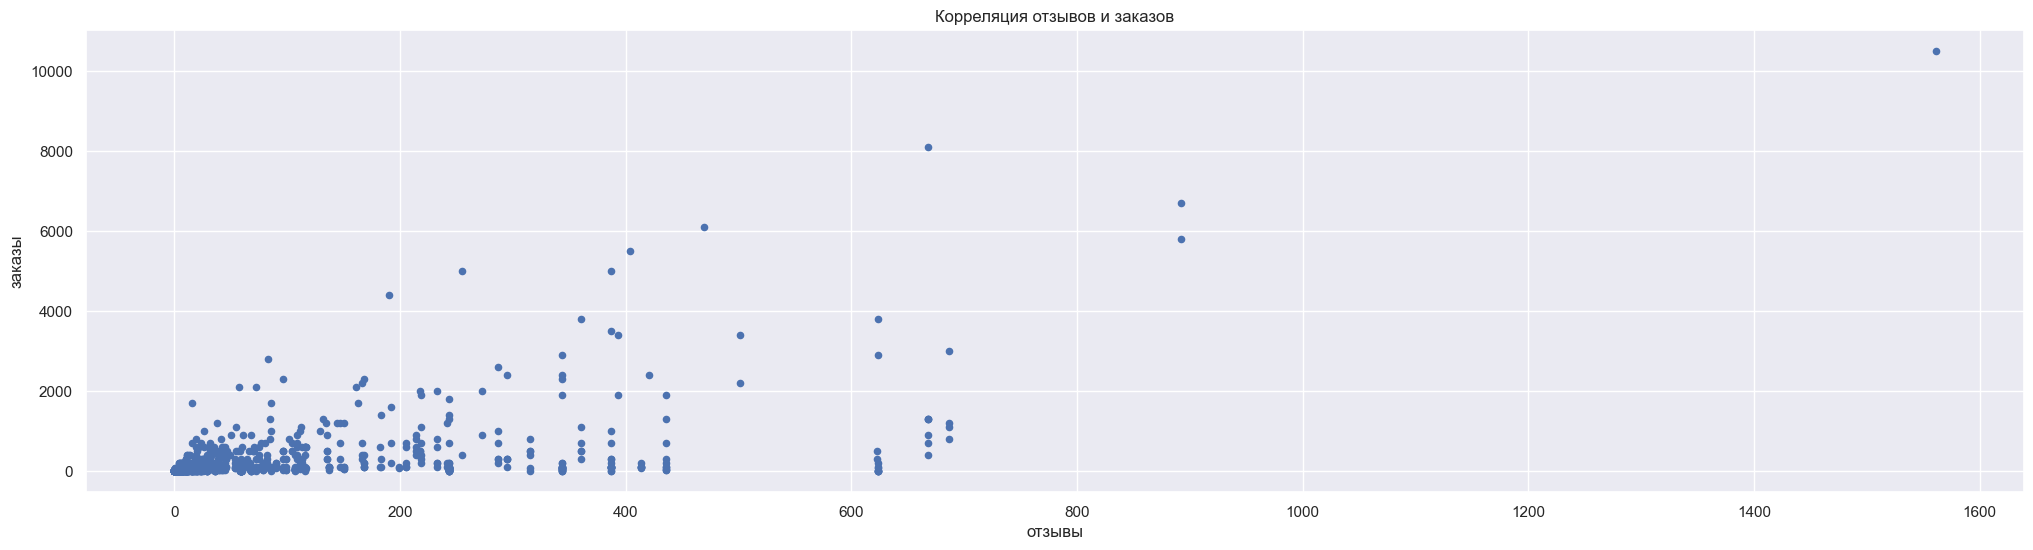

In [39]:
data.plot(x='feedbacks', y='orders', kind='scatter')
plt.xlabel('отзывы')
plt.ylabel('заказы')
plt.title('Корреляция отзывов и заказов');
data['orders'].corr(data['feedbacks'])

Величина заказов, как видно из графика, в наибольшей степени зависит от количестов отзывов

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.21318435589005286

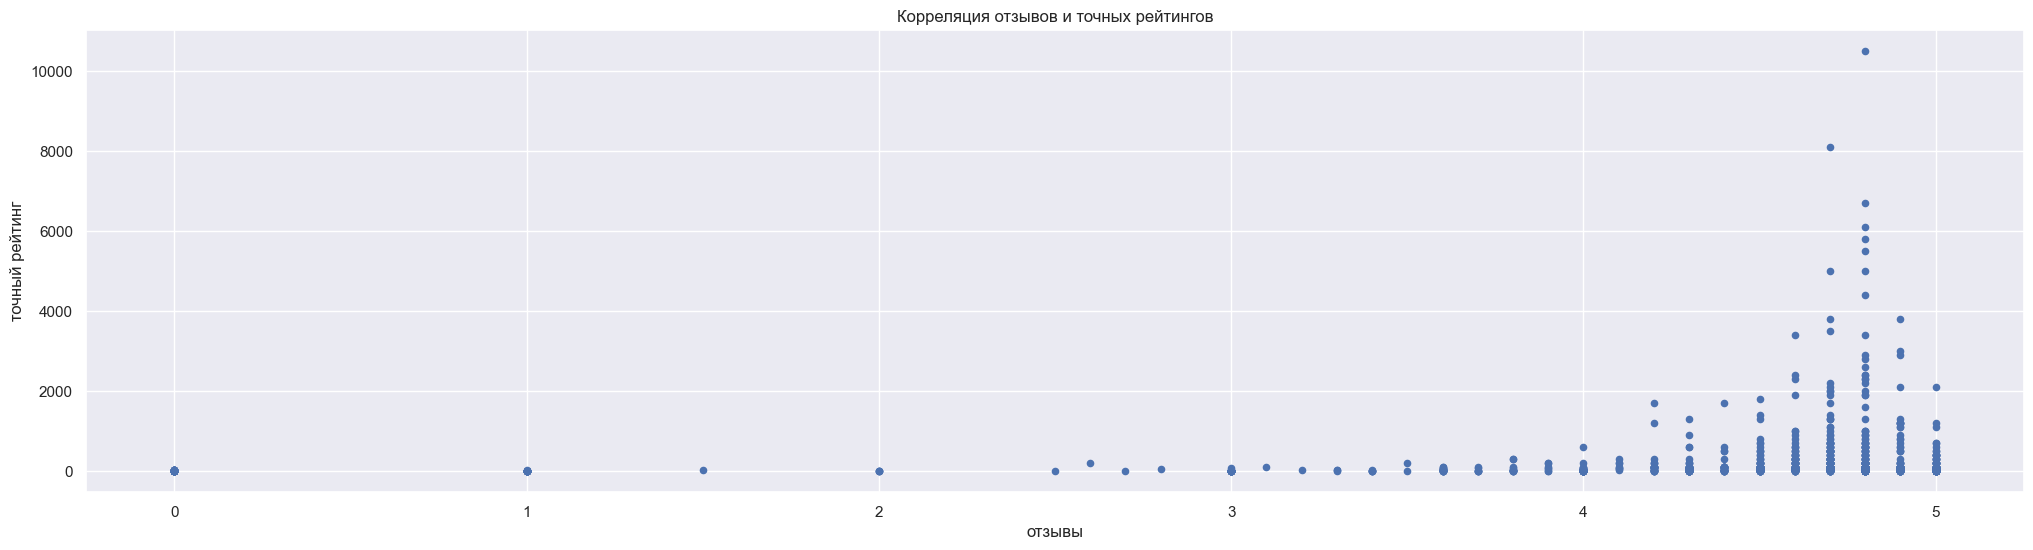

In [40]:
data.plot(x='reviewrating', y='orders', kind='scatter')
plt.xlabel('отзывы')
plt.ylabel('точный рейтинг')
plt.title('Корреляция отзывов и точных рейтингов');
data['orders'].corr(data['reviewrating'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.10531670758256292

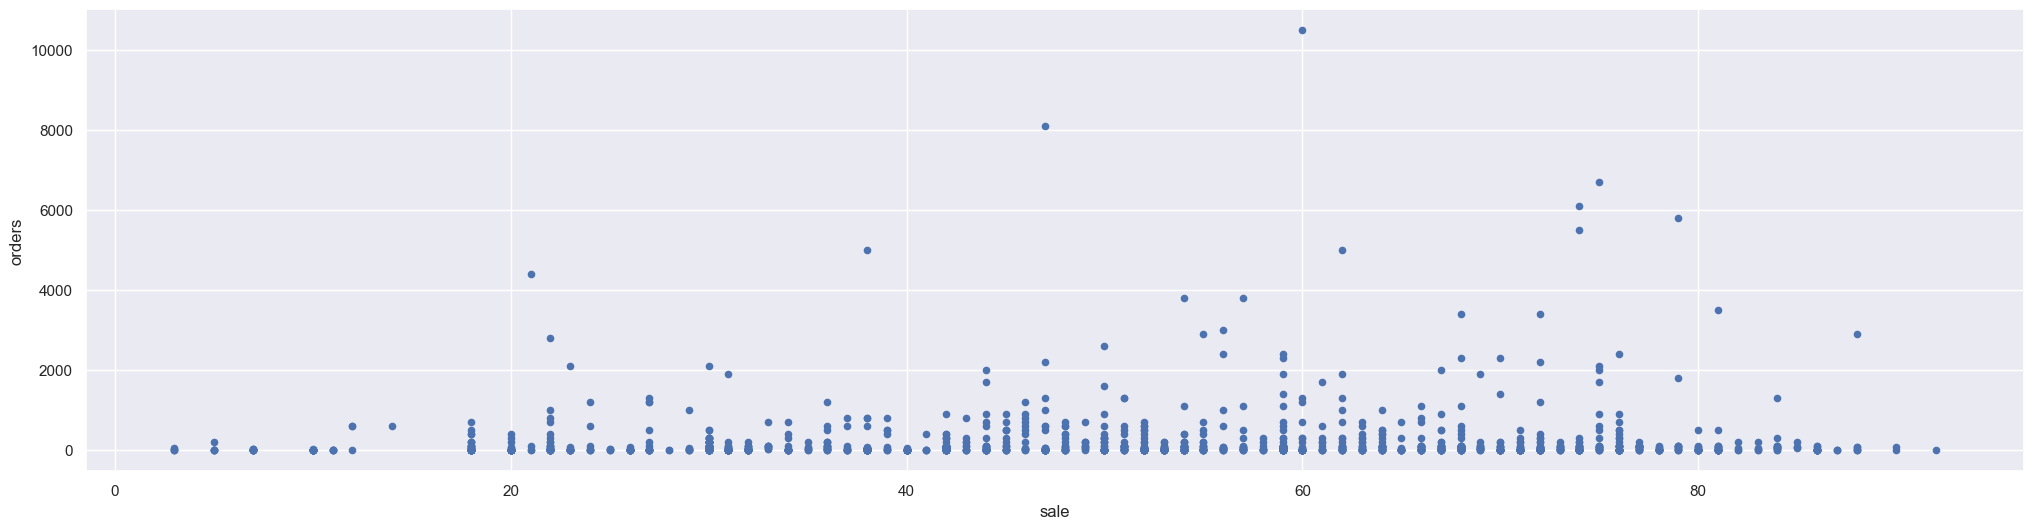

In [41]:
data.plot(x='sale', y='orders', kind='scatter');
data['orders'].corr(data['sale'])

Точный рейтинг так же влияет на продажи, но значительно меньше  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.2215233585944644

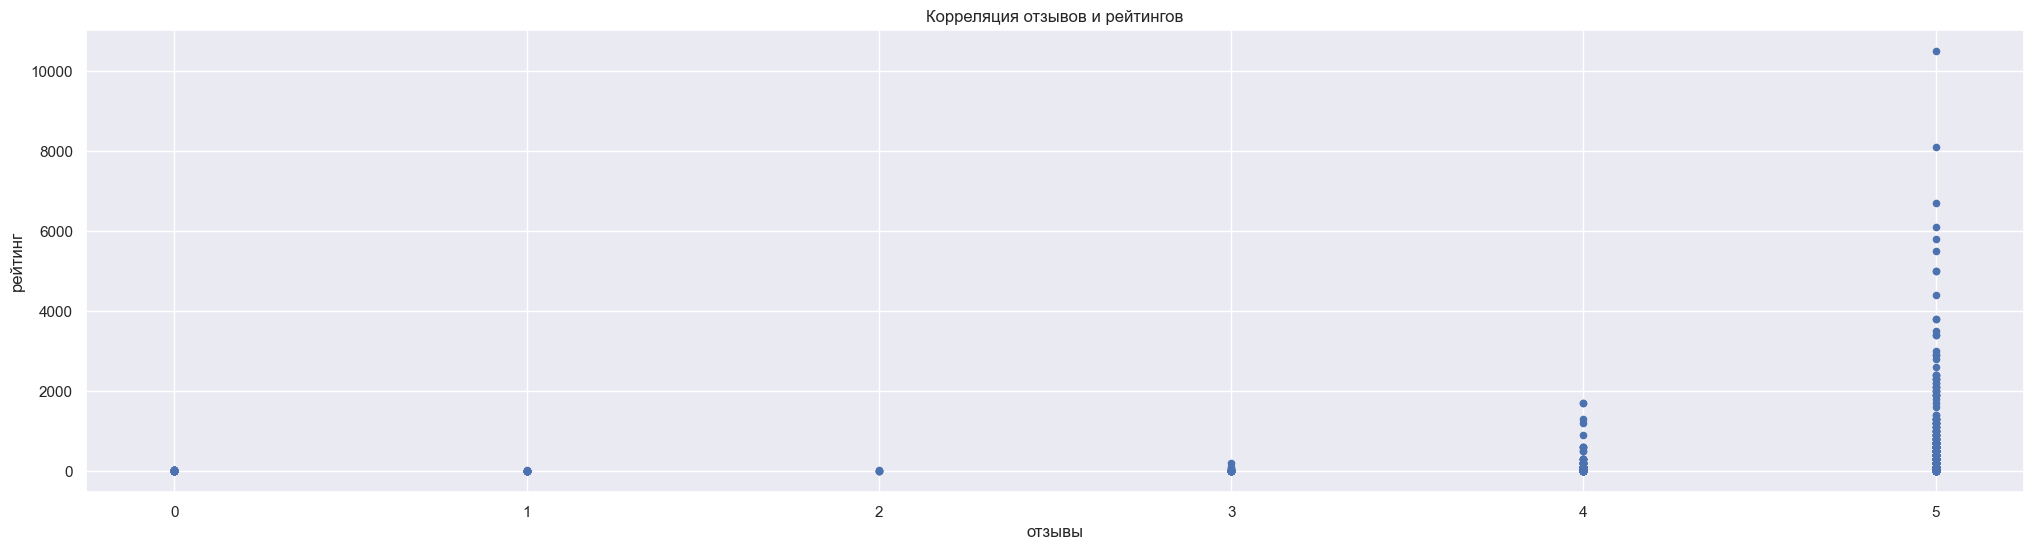

In [42]:
data.plot(x='rating', y='orders', kind='scatter')
plt.xlabel('отзывы')
plt.ylabel('рейтинг')
plt.title('Корреляция отзывов и рейтингов');
data['orders'].corr(data['rating'])

Точный рейтинг так же влияет на продажи, но значительно меньше, чем количество отзывов

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-0.06014331176746974

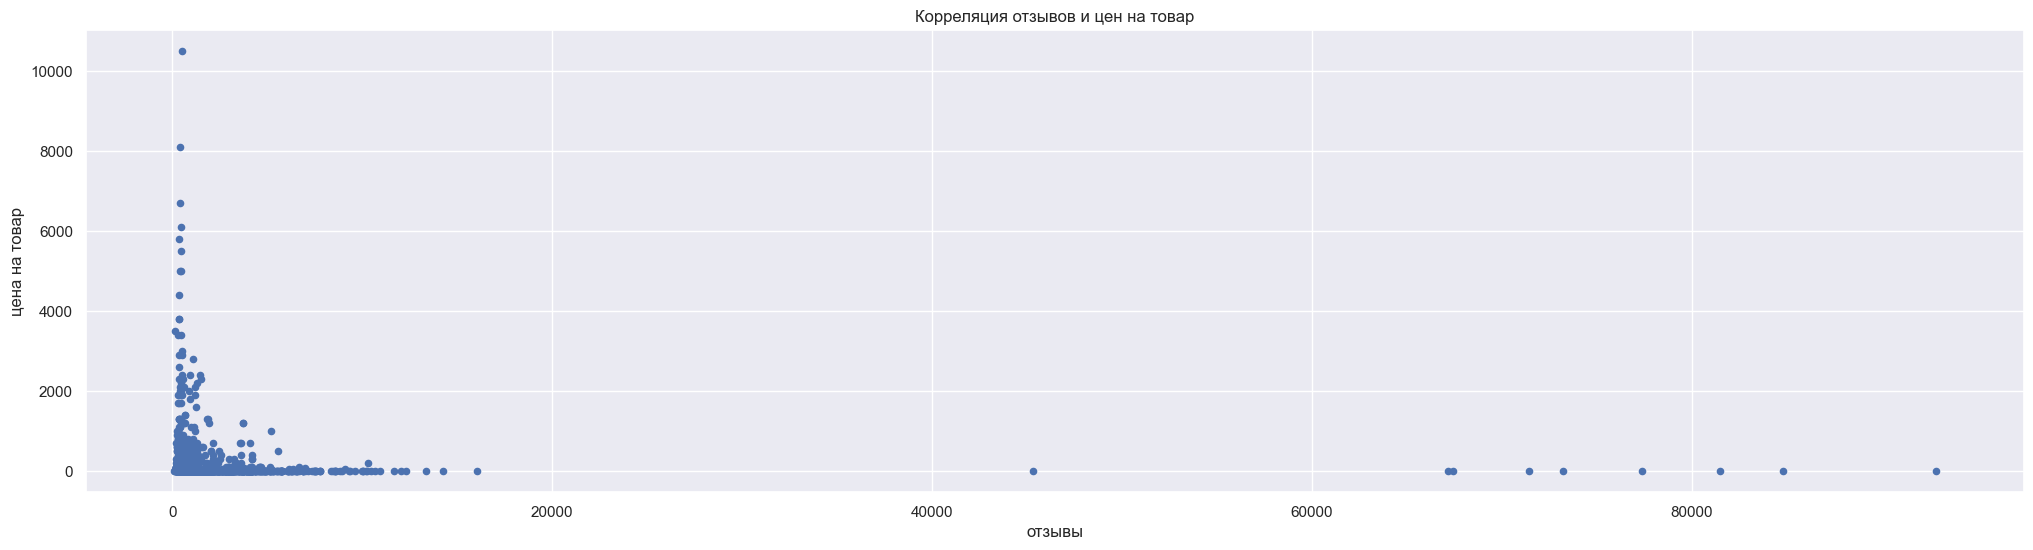

In [43]:
data.plot(x='salepriceu', y='orders', kind='scatter')
plt.xlabel('отзывы')
plt.ylabel('цена на товар')
plt.title('Корреляция отзывов и цен на товар');
data['orders'].corr(data['salepriceu'])

Цена не воздействует на количество заказов 

In [44]:
bandage_feedbacks = bandage.sort_values(by='feedbacks', ascending=False)
bandage_feedbacks = bandage_feedbacks.head(15)
bandage_sale = bandage.sort_values(by='sale', ascending=True)
bandage_sale = bandage_sale.head(15)
bandage_ransoms = bandage.sort_values(by='orders', ascending=False)
bandage_ransoms = bandage_ransoms.head(15)
#Выявим топ товаров по количеству отзывов, скидки и заказам 

In [45]:
bandage_feedbacks = bandage_feedbacks.drop(index=[19, 166]) 
#Удалим повторяющиеся товары 

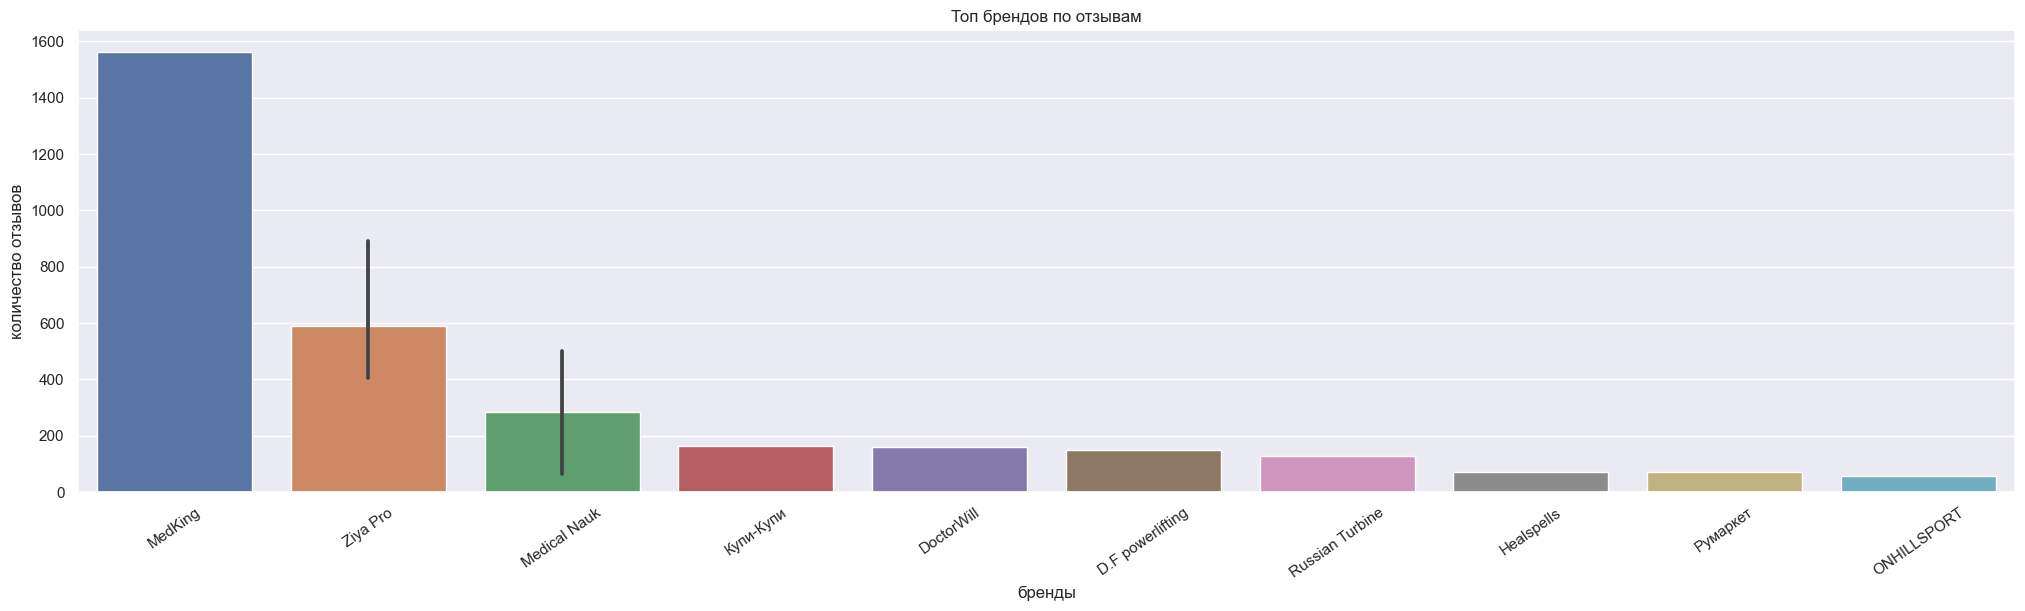

In [46]:
ax = sns.barplot(x= 'brand', y='feedbacks', data= bandage_feedbacks);
sns.set (rc={'figure.figsize':( 25 , 6 )}) 
ax.set (xlabel='бренды', ylabel='количество отзывов', title= 'Топ брендов по отзывам');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

Как видно больше всего отзывов у брендов MedKing, Ziya Pro и Medical Nauk 

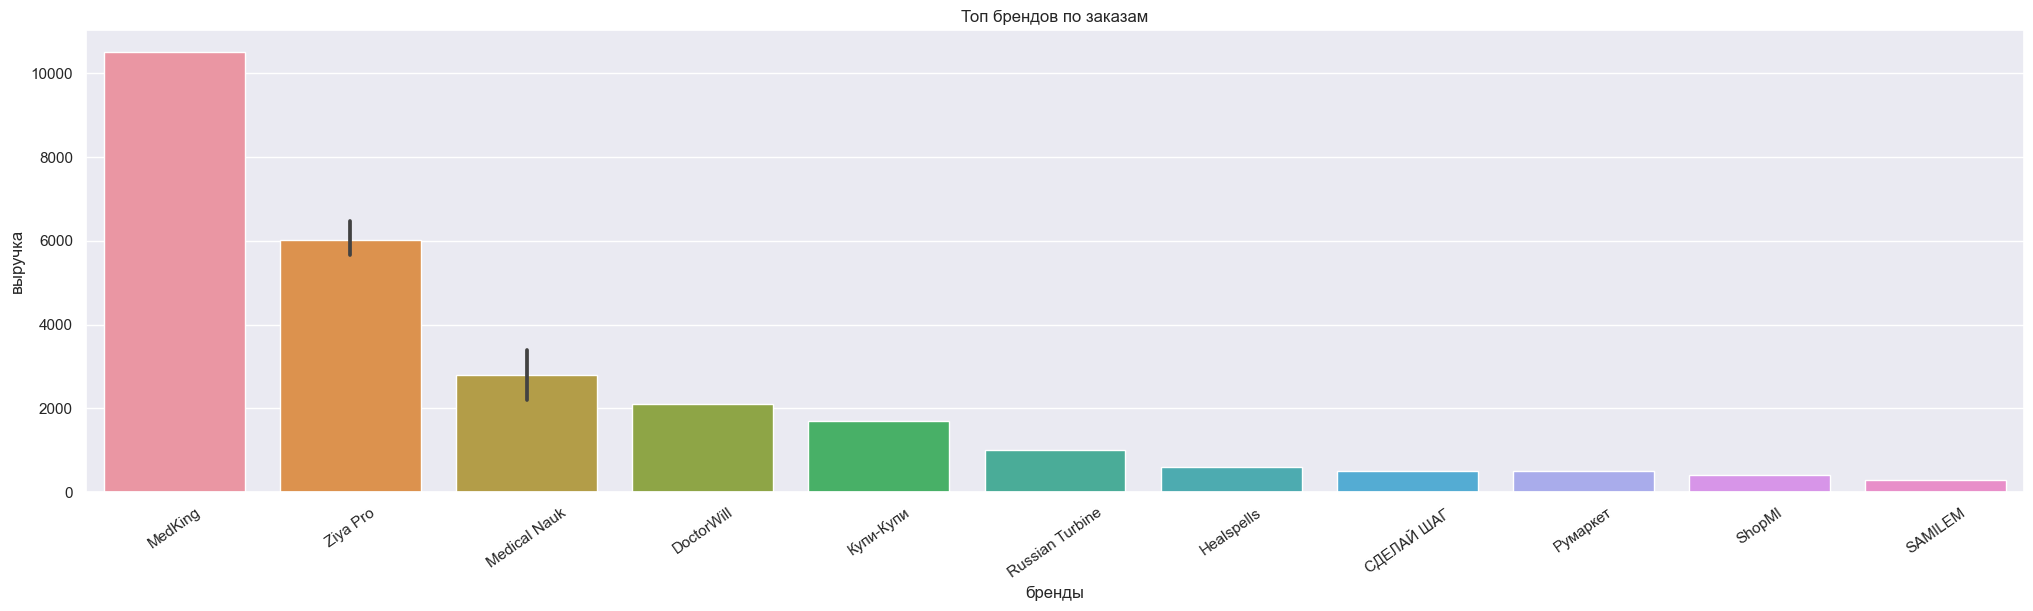

In [47]:
ax = sns.barplot(x= 'brand', y='orders', data=bandage_ransoms);
sns.set (rc={'figure.figsize':( 25 , 6 )}) 
ax.set (xlabel='бренды', ylabel='выручка', title= 'Топ брендов по заказам');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

Больше всего заказов у брендов MedKing, Ziya Pro и Medical Nauk. Как видно, корреляция между количеством отзывов и количеством заказов подтверждается 

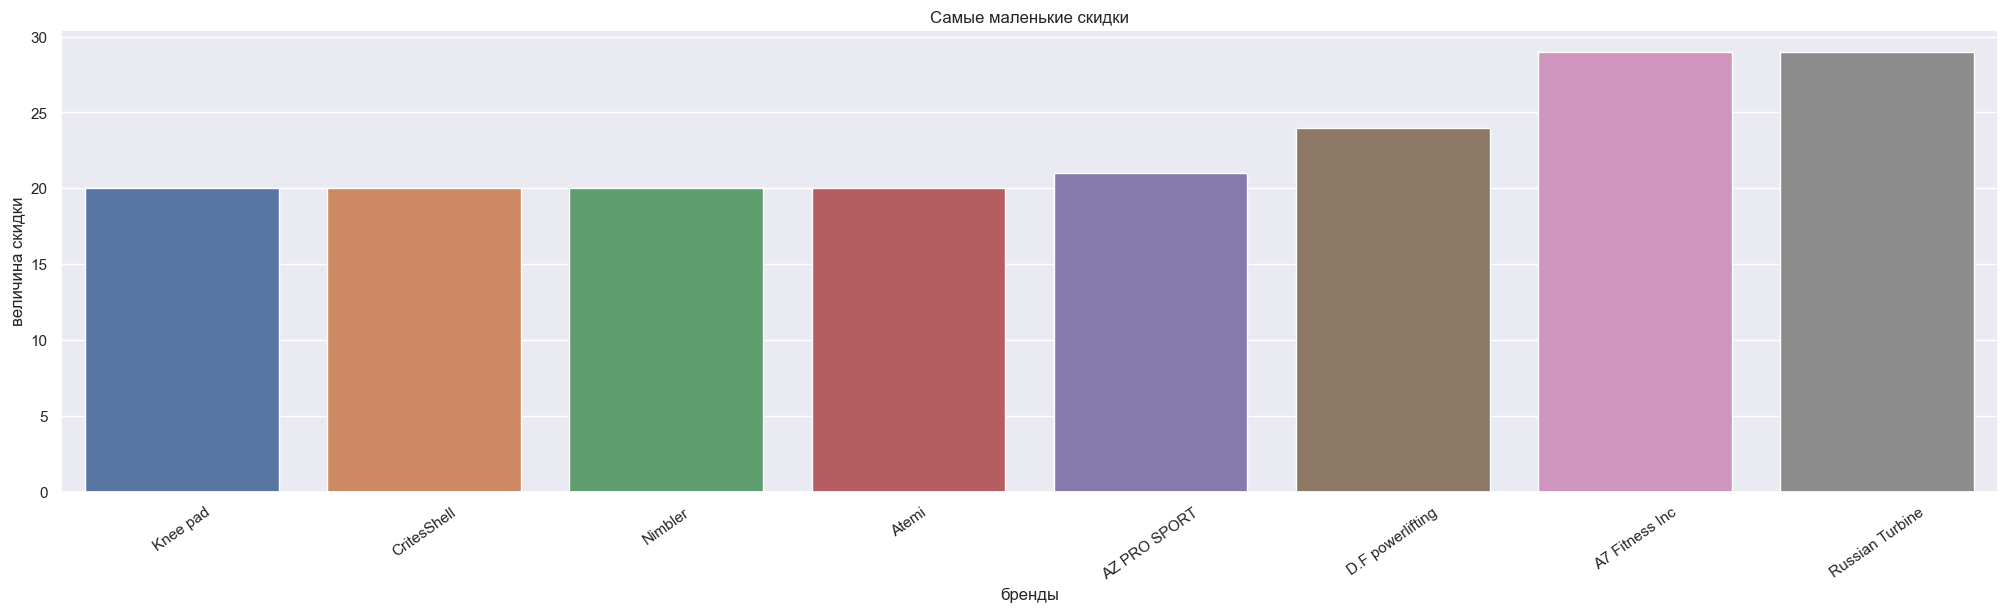

In [48]:
ax = sns.barplot(x= 'brand', y='sale', data=bandage_sale);
sns.set (rc={'figure.figsize':( 25 , 6 )}) 
ax.set (xlabel='бренды', ylabel='величина скидки', title= 'Самые маленькие скидки');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

В графике представлены бреды с самым маленьким размером скидки

Теперь посмотрим историю отзывов у разных брендов в нише

In [49]:
fb = pd.read_csv('feedback_data_100814501.csv', sep=',')
fb1 = pd.read_csv('feedback_data_11420685.csv', sep=',')
fb2 = pd.read_csv('feedback_data_122133594.csv', sep=',')
fb3 = pd.read_csv('feedback_data_142030723.csv', sep=',')
fb4 = pd.read_csv('feedback_data_151145997.csv', sep=',')
fb5 = pd.read_csv('feedback_data_16902048.csv', sep=',')
fb6 = pd.read_csv('feedback_data_17117817.csv', sep=',')
fb7 = pd.read_csv('feedback_data_17117819.csv', sep=',')
fb8 = pd.read_csv('feedback_data_18327889.csv', sep=',')
fb9 = pd.read_csv('feedback_data_20985581.csv', sep=',')
fb10 = pd.read_csv('feedback_data_36026479.csv', sep=',')
fb11 = pd.read_csv('feedback_data_50123744.csv', sep=',')
fb12 = pd.read_csv('feedback_data_50396360.csv', sep=',')
fb13 = pd.read_csv('feedback_data_59282782.csv', sep=',')
#Выгружаем датасеты с историей брендов

In [50]:
feedbacks = pd.concat([
    fb,
    fb1,
    fb2,
    fb3,
    fb4,
    fb5,
    fb6,
    fb7,
    fb8,
    fb9,
    fb10,
    fb11,
    fb12,
    fb13
])

In [51]:
feedbacks['date_published'] = pd.to_datetime(feedbacks['date_published'])

feedbacks['date_formatted'] = feedbacks['date_published'].dt.strftime('%Y-%m')
#Приводим даты публикации отзывов к периоду в один месяц

In [52]:
bandage_feed = bandage.merge(feedbacks, on=['id'])


In [53]:
rat5 = bandage_feed.query('rating_y == 5')

In [54]:
brand_total_feedbacks = rat5.pivot_table(index=['brand','date_formatted'], values='rating_y', aggfunc = 'count')

In [55]:
brand_total_feedbacks = brand_total_feedbacks.reset_index()
brand_total_feedbacks.info()
brand_total_feedbacks = brand_total_feedbacks.sort_values(by='date_formatted', ascending=True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           195 non-null    object
 1   date_formatted  195 non-null    object
 2   rating_y        195 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.7+ KB


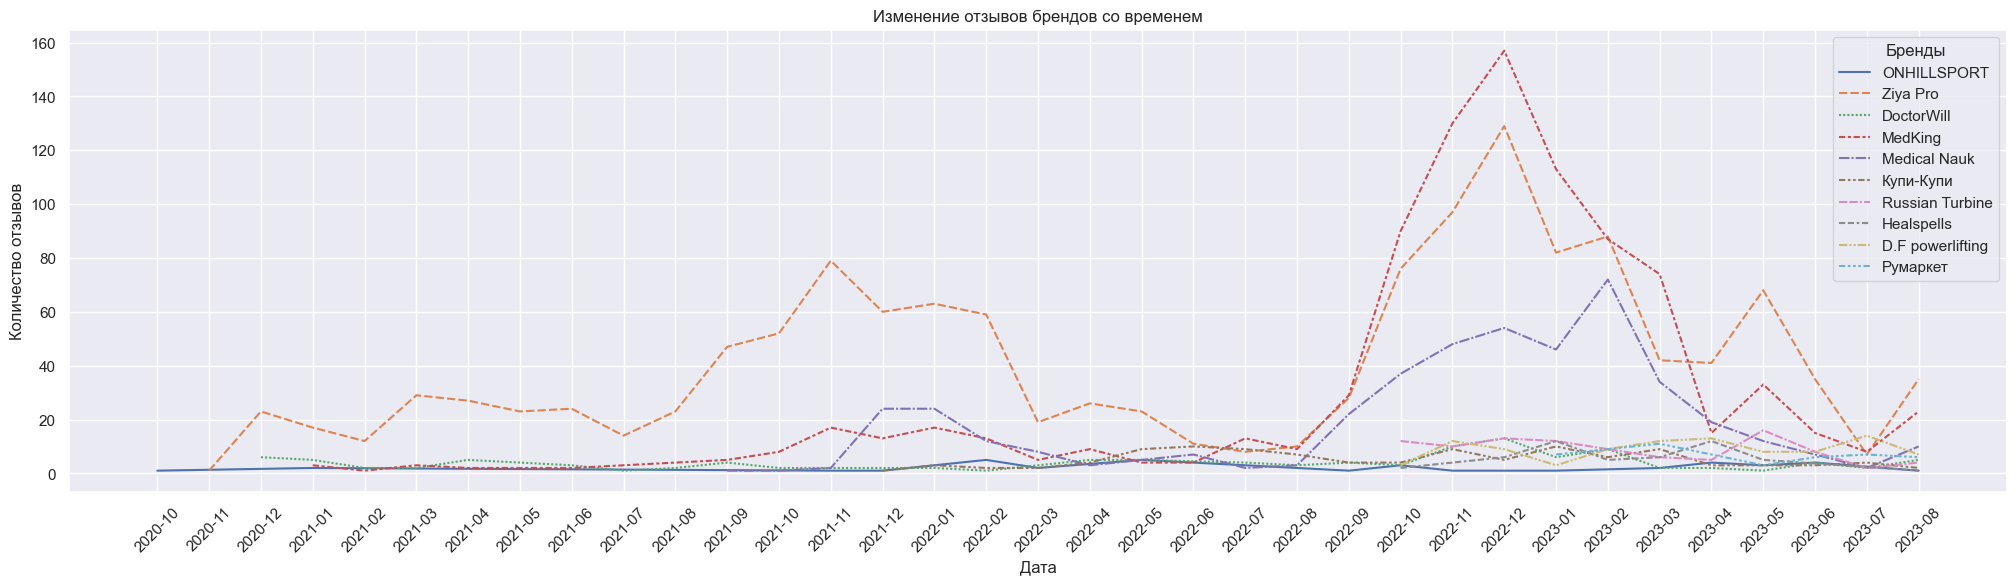

In [56]:
ax = sns.lineplot(data=brand_total_feedbacks, x='date_formatted', y='rating_y', hue='brand', style='brand')
ax.set(xlabel='Дата', ylabel='Количество отзывов')
ax.set_title('Изменение отзывов брендов со временем')
plt.xticks(rotation=45)
ax.legend(title='Бренды')
plt.show()

График демонстрирует историю отзывов. Как видно, бренды MedKing, Ziya Pro и Medical Nauk получили больше всего отзывов с конца лета прошлого года по начало весны этого года. При этом пик отзывов пришелся на Новый год. Таким образом, можно сказать, что мы имеем дело с сезонным товаром. 

6. Выявление товара, который можно рассмотреть для продажи.

Поскольку продаж у этих брендов больше всего, можно посмотреть аналогичный график у брендов с меньшим числом заказов 

In [57]:
rat4 = bandage_feed.query('brand != ["MedKing", "Ziya Pro", "Medical Nauk"] and rating_y == 5 ')
# Исключаем бренды с помощью среза 

In [58]:
brand_total_feedbacks_4 = rat4.pivot_table(index=['brand','date_formatted'], values='rating_y', aggfunc = 'count')

In [59]:
brand_total_feedbacks_4 = brand_total_feedbacks_4.reset_index()
brand_total_feedbacks_4 = brand_total_feedbacks_4.sort_values(by='date_formatted', ascending=True) 


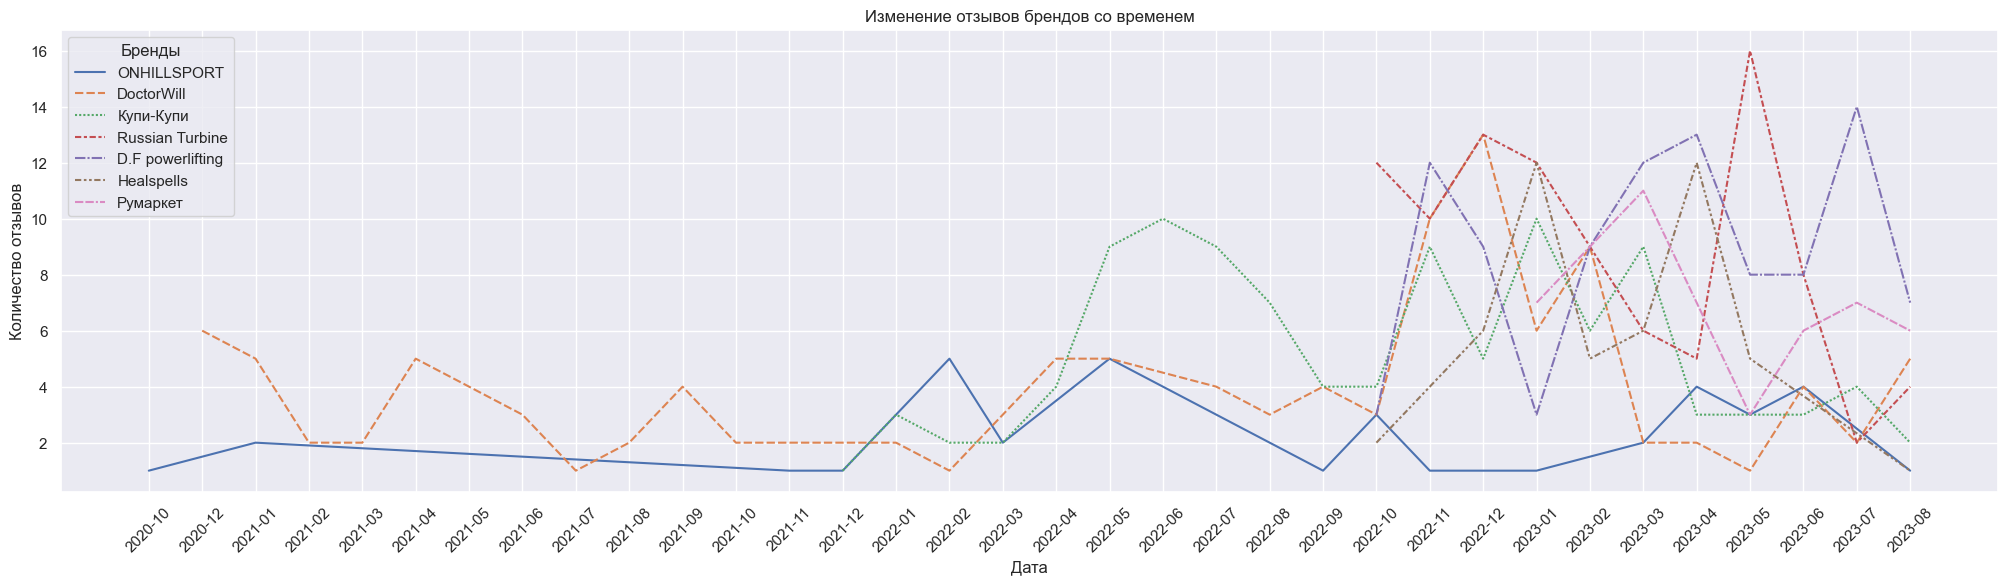

In [60]:
ax = sns.lineplot(data=brand_total_feedbacks_4, x='date_formatted', y='rating_y', hue='brand', style='brand')
ax.set(xlabel='Дата', ylabel='Количество отзывов')
ax.set_title('Изменение отзывов брендов со временем')
plt.xticks(rotation=45)
ax.legend(title='Бренды')
plt.show()


Как видно из графика, количество отзывов у оставшихся брендов начало резко расти с сентября 2022 года и на протяжении последнего года количество отзывов было примерно одним и тем же. Тем не менее, летом этого года все же наблюдался спад отзывов. Учивыя то, что демонстрировали прошлые графики, интерес к товару может снова возникнуть к Новому году. С учетом этого периода и стоит определяться с выходом на рынок

In [61]:
rat_by_text = rat4.sort_values(by='orders', ascending=False)
rat_by_feedbacks = rat4.sort_values(by='feedbacks', ascending=False)
rat_by_ransoms = rat4.sort_values(by='ransoms', ascending=False)

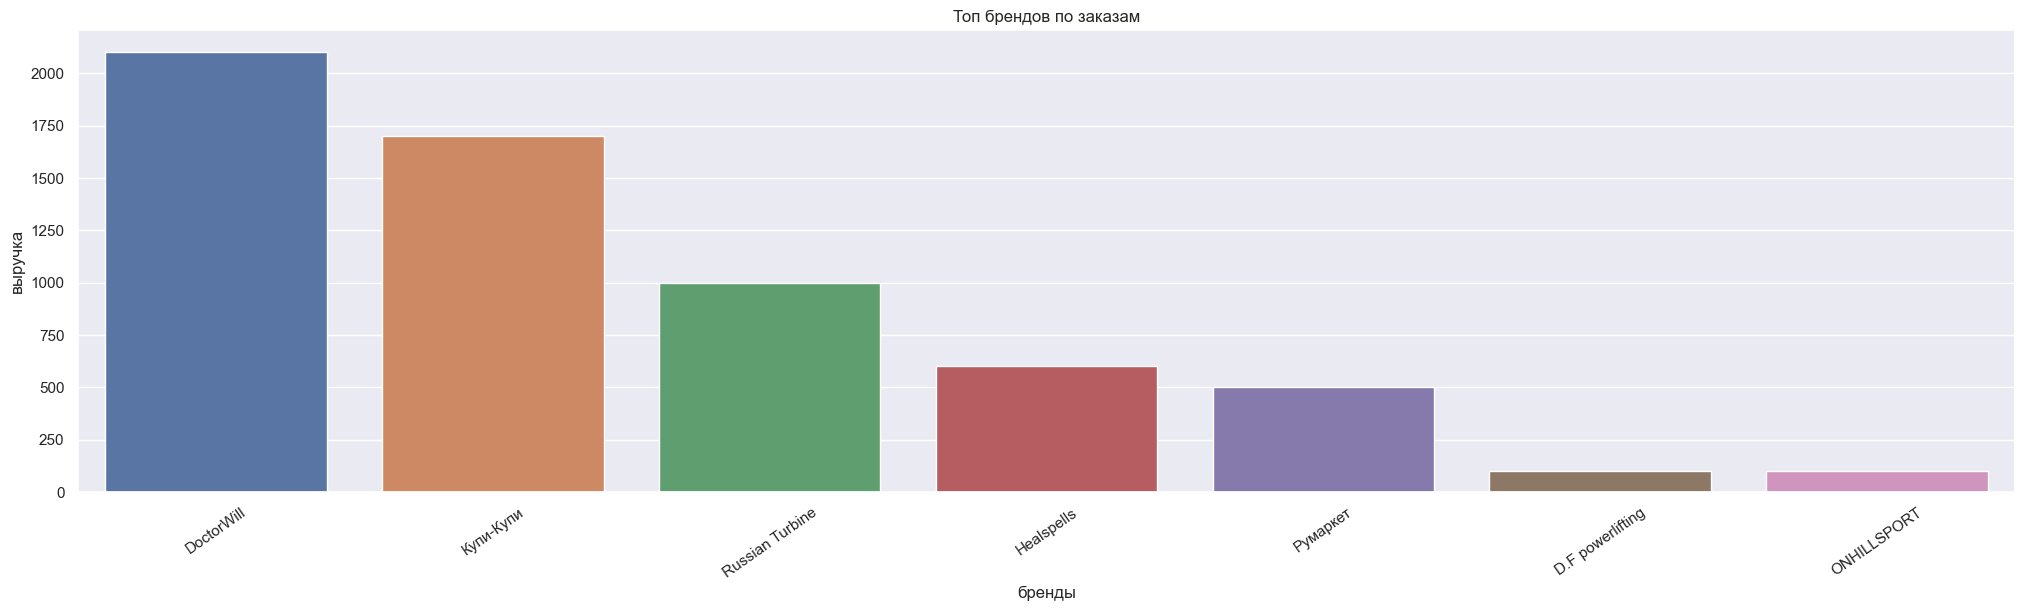

In [62]:
ax = sns.barplot(x= 'brand', y='orders', data=rat_by_text);
sns.set (rc={'figure.figsize':( 25 , 6 )}) 
ax.set (xlabel='бренды', ylabel='выручка', title= 'Топ брендов по заказам');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);
#Посотрим топ оставшихся брендов по велечине заказов

Как видно из графика в нише достаточно высокое число заказов. В топ 5 входят бренды с минимум 500 заказами  

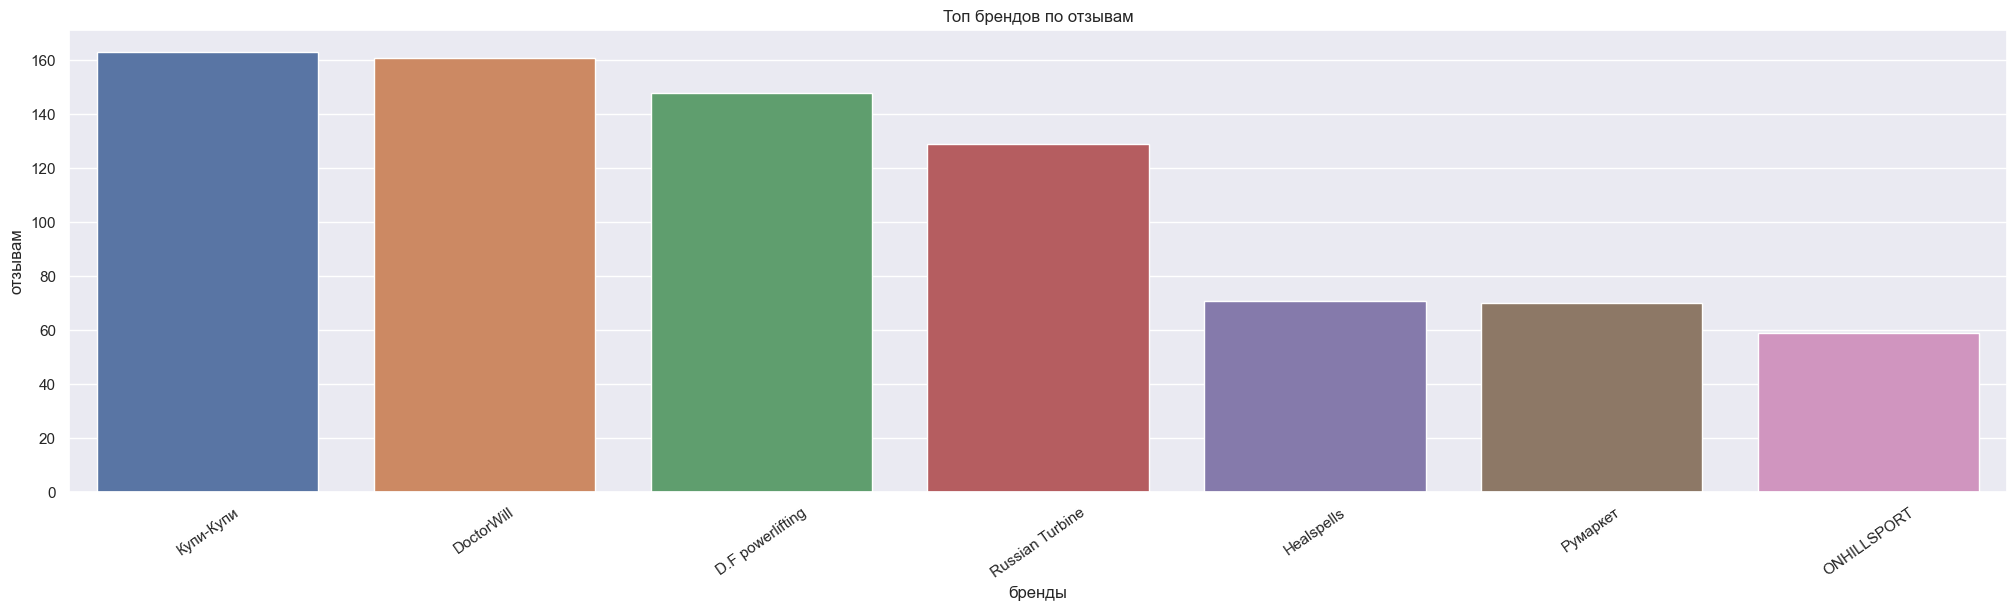

In [63]:
ax = sns.barplot(x= 'brand', y='feedbacks', data=rat_by_feedbacks);
sns.set (rc={'figure.figsize':( 25 , 6 )}) 
ax.set (xlabel='бренды', ylabel='отзывам', title= 'Топ брендов по отзывам');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);
#Топ по количесту отзывов

Как и в предыдущих случаях, количество отзывов напрямую коррелирует с количеством заказов.  

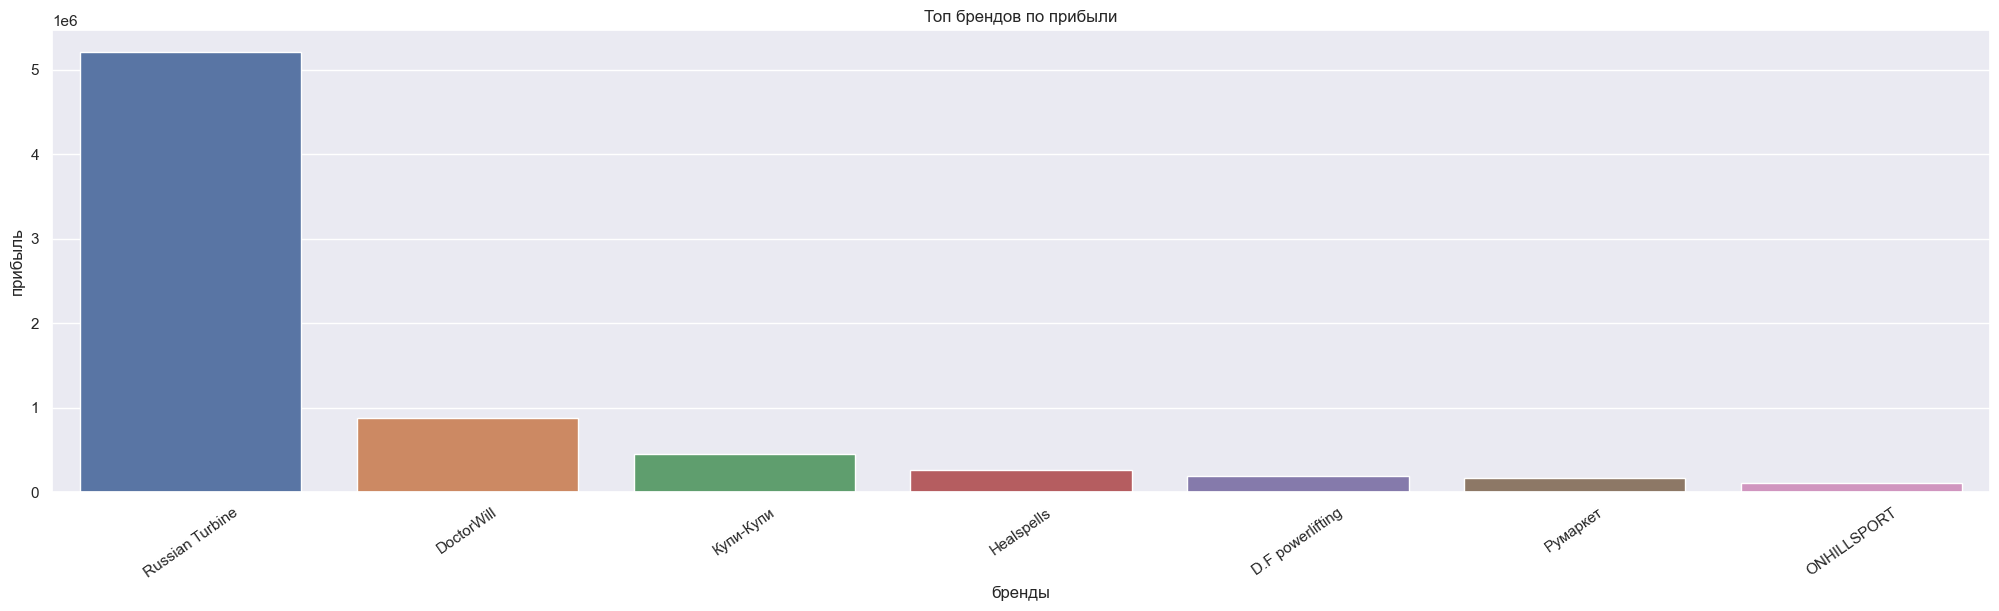

In [64]:
ax = sns.barplot(x= 'brand', y='ransoms', data=rat_by_ransoms);
sns.set (rc={'figure.figsize':( 25 , 6 )}) 
ax.set (xlabel='бренды', ylabel='прибыль', title= 'Топ брендов по прибыли');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);
#Выявим примерную прибыль с товаров 

Бренд Russian Turbine собрал самый большой оборот. Он значительно превосходит остальные. Исключим его 

In [65]:
rat3 = bandage_feed.query('brand != ["MedKing", "Ziya Pro", "Medical Nauk", "Russian Turbine"] and rating_y == 5 ')

In [66]:
rat3_by_ransoms = rat3.sort_values(by='ransoms', ascending=False)
rat3_by_ransoms = rat3.sort_values(by='ransoms', ascending=False)


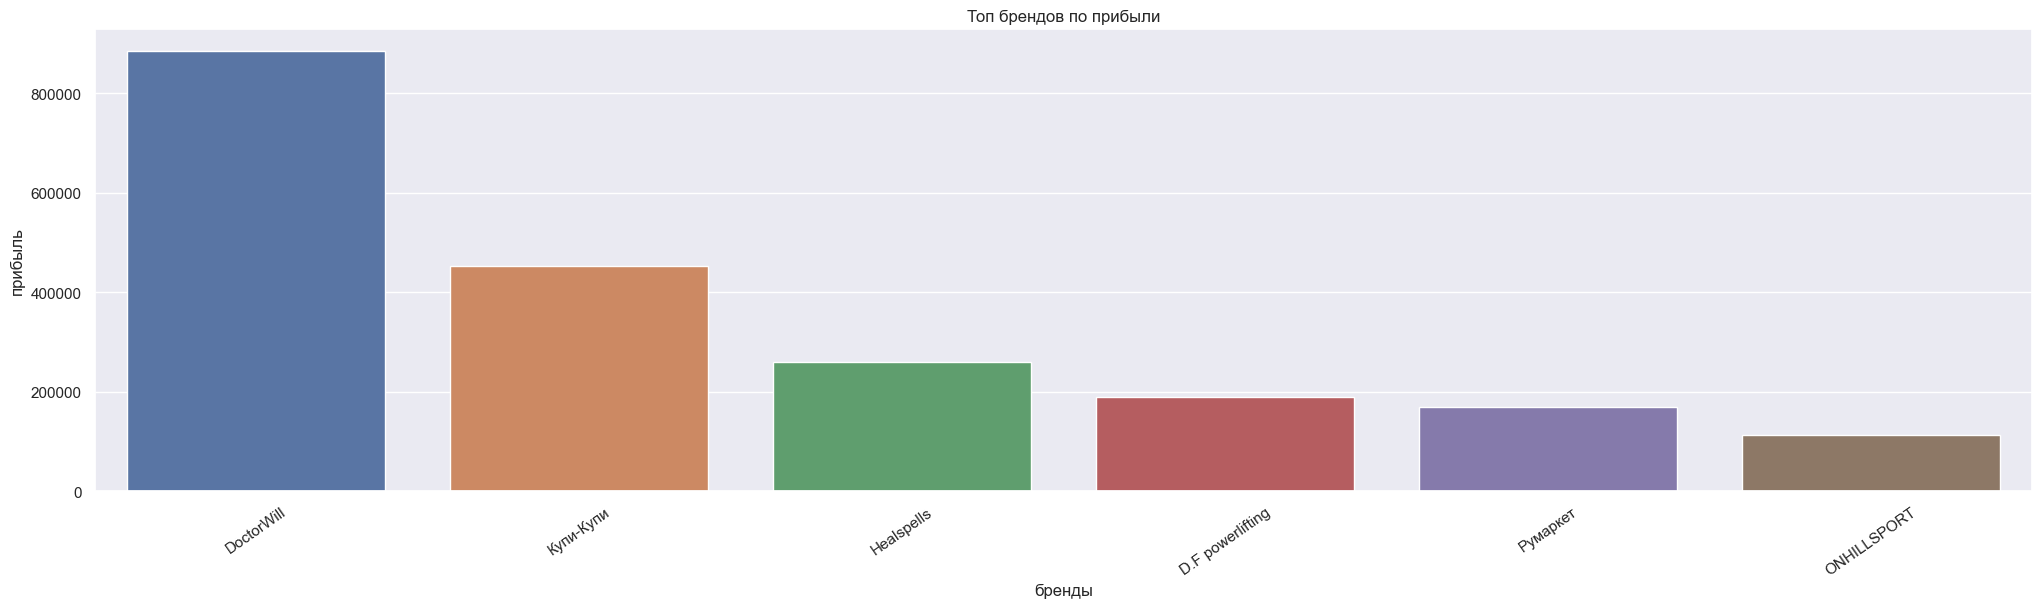

In [67]:
ax = sns.barplot(x= 'brand', y='ransoms', data=rat3_by_ransoms);
sns.set (rc={'figure.figsize':( 25 , 6 )}) 
ax.set (xlabel='бренды', ylabel='прибыль', title= 'Топ брендов по прибыли');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

Как видно, примерная прибыль по товарам может составить более 800000 рублей. Из данного топа можно посмотреть на товар, примерная прибыль которого составила более 200000 рублей. Это Healspells

In [68]:
rat2_by_heal = bandage_feed.query('brand == ["Healspells", "Румаркет"]')

In [69]:
rat2_by_heal = rat2_by_heal.pivot_table(index=['brand','date_published'], values='rating_y', aggfunc = 'count')
rat2_by_heal = rat2_by_heal.reset_index()
rat2_by_heal = rat2_by_heal.sort_values(by='date_published', ascending=True)


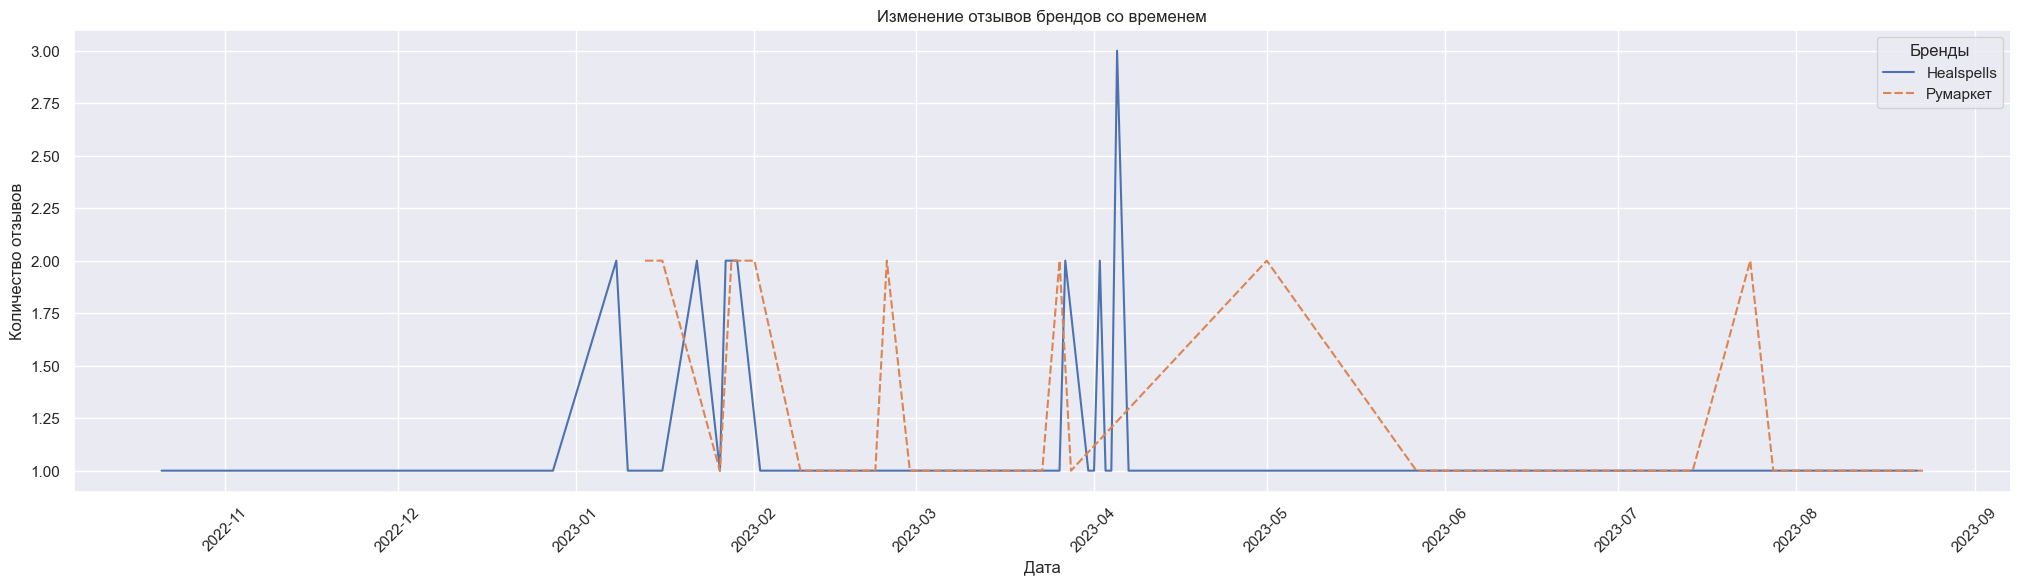

In [70]:
ax = sns.lineplot(data=rat2_by_heal, x='date_published', y='rating_y', hue='brand', style='brand')
ax.set(xlabel='Дата', ylabel='Количество отзывов')
ax.set_title('Изменение отзывов брендов со временем')
plt.xticks(rotation=45)
ax.legend(title='Бренды')
plt.show()



Как видно из графика, отзывы на Healspells появились только в ноябре прошлого года и с тех пор регулярно появляются в карточке товара. 

In [71]:
Healspells = bandage.query('brand == "Healspells"')
Healspells

id       brand                                               name  \
172  122133594  Healspells  Лечебный наколенники из собачьей шерсти  Согре...   

     sale  rating  reviewrating  feedbacks  time1  time2  priceu  salepriceu  \
172    68       5           4.9         71      5     49    1354         433   

     orders  ransoms  pricer  priceru   percent  
172     600   259800     400     1400  1.199232

Товар можно рассмотреть для продажи на маркетплейсе с учетом большой скидки и сезонности. Тем не менее, остальные показати достаточно неплохие: высокий рейтинг, больше число отзывов и заказов, цена со скидкой достаточно популярная в категории. 

7. Выводы и рекомендации 

Я изучил подкатегорию "Аксессуары и инвентарь для тяжелой атлетики". 

1. Выгрузил датасет с характеристиками товаров, а также с количеством заказов. Соединил датасеты 
2. Убрал лишние колонки и создал новые, привел данные к нужному типу, почистил от лишних символов названия товаров, проверил на пропуски и дубликаты. 
3. В исследовательском анализе данных я показал, что:
- Больше всего заказов в данной подкатегории было сделано за цену после скидки - 400 рублей 
- Больше всего заказов в данной подкатегории было сделано за цену без скидки - 700 рублей
- Средний размер скидки в данной подкатегории составляет - 47 рублей 
- У товаров с большой скидкой много заказов
- В нише наколенников лишь 24 % заказов было у малопредставленных брендов. Конкуренция в нише очень высокая 
- Наибольшая корреляция в подкатегории между количеством отзывов и заказами, в меньшей степени от рейтингов. Цена товара не влияет на число заказов. 
4. Я сделал срез данных и сделал новую колонку, в которой отражается примерный размер прибыли по нишам. В нишах со средней примерной прибылью до 200000 рублей самыми доходными оказались наколенники для атлетики 
5. Я сделал срез данных по этой нише с наколенниками и показал топ брендов по отзывам, заказам, а также товары с наименьшей скидкой. В топе по отзывам и заказам оказались бренды: MedKing, Ziya Pro и Medical Nauk. 
6. Я провел анализ истории отзывов товаров. Больше всего положительных отзывов бренды получали в зимний период и особенно на Новый год, что говорит о сезонности товара. 
7. После того, как я убрал бренды MedKing, Ziya Pro и Medical Nauk, оказалось, что отзывы на остальные бренды стали приходить после сентября прошлого года и оставались примерно на одном и том же уровне вплоть до нынешнего времени. Однако, как видно, на графиках летом число отзывов стало снижаться. 
8. У оставшихся брендов так же больше всего заказов у тех товаров, которые полчили больше всего отзывов. 

Рекомендации 

Я бы советовал рассмотреть товар для продажи Healspells. Он появился на рынке только в прошлом году, но на него уже было много заказов, у него высокий рейтинг и приличное число отзывов. Достаточно высокий уровень скидки, что нужно учитывать в цене. Сезонность тоже важна, поскольку отзывов было больше на период осени-зимы. 